In [15]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 7134 images belonging to 3 classes.
Found 206 images belonging to 3 classes.


In [16]:
# create model structure
RPS_model = Sequential()
RPS_model.add(Conv2D(32, kernel_size=(3, 3)))
RPS_model.add(LeakyReLU(alpha=0.1))
RPS_model.add(Conv2D(64, kernel_size=(3, 3)))
RPS_model.add(LeakyReLU(alpha=0.1))
RPS_model.add(MaxPooling2D(pool_size=(2, 2)))
RPS_model.add(Dropout(0.25))
RPS_model.add(Conv2D(128, kernel_size=(3, 3)))
RPS_model.add(LeakyReLU(alpha=0.1))
RPS_model.add(MaxPooling2D(pool_size=(2, 2)))
RPS_model.add(Conv2D(128, kernel_size=(3, 3)))
RPS_model.add(MaxPooling2D(pool_size=(2, 2)))
RPS_model.add(LeakyReLU(alpha=0.1))
RPS_model.add(Dropout(0.25))
RPS_model.add(Flatten())
RPS_model.add(Dense(1024))
RPS_model.add(LeakyReLU(alpha=0.1))
RPS_model.add(Dropout(0.5))
RPS_model.add(Dense(3, activation='softmax'))
RPS_model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.legacy.Adam(), metrics=['accuracy'])

In [17]:
import matplotlib.pyplot as plt

# Define the number of training epochs
epochs = 100  # Specify the total number of training epochs

# Create empty lists to store training history
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []

# Training loop for the specified number of epochs
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # Fit the model for one epoch
    history = RPS_model.fit(
        train_generator,
        steps_per_epoch=7145 // 64,  # Adjust based on your batch size
        epochs=1,  # Train for one epoch at a time
        validation_data=validation_generator,
        validation_steps=206 // 64  # Adjust based on your batch size
    )
    
    # Append training metrics to the lists
    train_loss.append(history.history['loss'][0])  # [0] is used to get the value for the current epoch
    val_loss.append(history.history['val_loss'][0]) 
    train_accuracy.append(history.history['accuracy'][0]) 
    val_accuracy.append(history.history['val_accuracy'][0])  



Epoch 1/100
111/111 [==============================] - 25s 220ms/step - loss: 1.0961 - accuracy: 0.3806 - val_loss: 1.0986 - val_accuracy: 0.3125
Epoch 2/100
111/111 [==============================] - 29s 264ms/step - loss: 1.0899 - accuracy: 0.3798 - val_loss: 1.1083 - val_accuracy: 0.3281
Epoch 3/100
111/111 [==============================] - 41s 365ms/step - loss: 1.0768 - accuracy: 0.3973 - val_loss: 1.1144 - val_accuracy: 0.3333
Epoch 4/100
111/111 [==============================] - 44s 396ms/step - loss: 1.0572 - accuracy: 0.4386 - val_loss: 1.0415 - val_accuracy: 0.4583
Epoch 5/100
111/111 [==============================] - 43s 389ms/step - loss: 1.0021 - accuracy: 0.4884 - val_loss: 1.0432 - val_accuracy: 0.4583
Epoch 6/100
111/111 [==============================] - 46s 412ms/step - loss: 0.9293 - accuracy: 0.5492 - val_loss: 0.9354 - val_accuracy: 0.5625
Epoch 7/100
111/111 [==============================] - 47s 421ms/step - loss: 0.8269 - accuracy: 0.6191 - val_loss: 0.8484 -

Epoch 57/100
111/111 [==============================] - 44s 396ms/step - loss: 0.1541 - accuracy: 0.9204 - val_loss: 1.3792 - val_accuracy: 0.7292
Epoch 58/100
111/111 [==============================] - 48s 434ms/step - loss: 0.1466 - accuracy: 0.9208 - val_loss: 1.4842 - val_accuracy: 0.6875
Epoch 59/100
111/111 [==============================] - 49s 445ms/step - loss: 0.1563 - accuracy: 0.9157 - val_loss: 1.2336 - val_accuracy: 0.7344
Epoch 60/100
111/111 [==============================] - 51s 462ms/step - loss: 0.1525 - accuracy: 0.9178 - val_loss: 1.3622 - val_accuracy: 0.7188
Epoch 61/100
111/111 [==============================] - 48s 429ms/step - loss: 0.1541 - accuracy: 0.9174 - val_loss: 1.4131 - val_accuracy: 0.7292
Epoch 62/100
111/111 [==============================] - 49s 444ms/step - loss: 0.1505 - accuracy: 0.9192 - val_loss: 1.4415 - val_accuracy: 0.7240
Epoch 63/100
111/111 [==============================] - 425s 4s/step - loss: 0.1583 - accuracy: 0.9174 - val_loss: 1.5

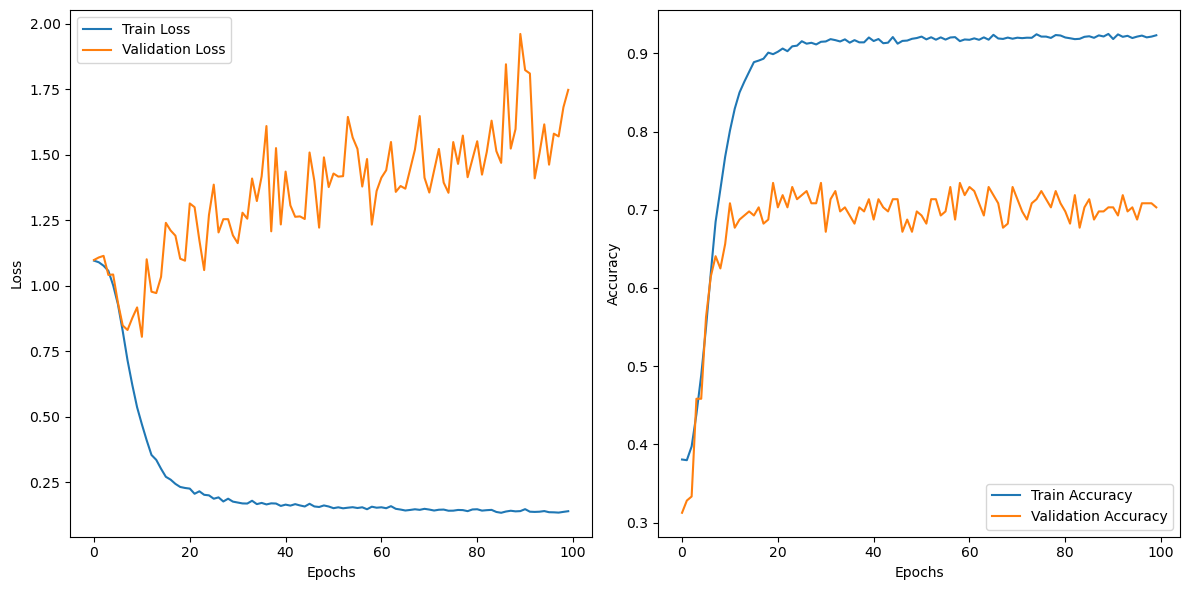

<Figure size 640x480 with 0 Axes>

In [18]:
# After all epochs are completed, draw the chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracy, label='Train Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('training_progress_leakyrelu.png')


In [19]:


# save model structure in jason file
model_json = RPS_model.to_json()
with open("RPS_model_leakyrelu.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
RPS_model.save_weights('RPS_model_leakyrelu.h5')